<a href="https://colab.research.google.com/github/MostafaFiroozi/Brain-Scan-Denoising/blob/main/Lung_Scan_Segmentation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Authur @Mostafa Firoozi 
Thanks to @Digitalsreeni utube channle

In this project we will denoise and segmenta lung scan image using histogram method

Importing required Libraries

In [2]:
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import io , img_as_float , img_as_ubyte
import numpy as np
from matplotlib import pyplot as plt


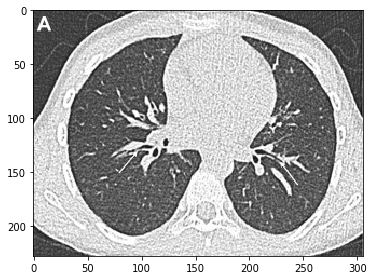

In [29]:
img=io.imread("/content/gr3.jpg", as_gray=True)
io.imshow(img)

estimated noise standard deviation = 0.03895043864542934


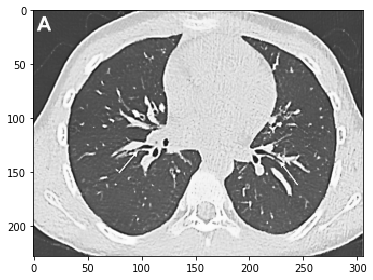

In [30]:
img=img_as_float(img)
sigma_est = np.mean(estimate_sigma(img))
patch_kw = dict(patch_size=5,      # 5x5 patches
                patch_distance=6  # 13x13 search area
                )
print(f'estimated noise standard deviation = {sigma_est}')
# slow algorithm
denoised_img = denoise_nl_means(img, h=2 * sigma_est, fast_mode=False,
                           **patch_kw)
denoised_img_u=img_as_ubyte(denoised_img)
io.imshow(denoised_img)


Plotting The histogram of the image

(array([0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 3.000e+00,
        1.000e+00, 1.000e+01, 1.000e+01, 1.400e+01, 2.900e+01, 2.600e+01,
        5.400e+01, 4.700e+01, 1.100e+02, 8.500e+01, 1.730e+02, 1.280e+02,
        2.340e+02, 1.790e+02, 2.690e+02, 2.750e+02, 1.790e+02, 3.800e+02,
        3.350e+02, 2.307e+03, 2.610e+03, 1.430e+03, 5.920e+02, 8.770e+02,
        1.199e+03, 1.433e+03, 3.054e+03, 2.344e+03, 3.414e+03, 1.958e+03,
        2.443e+03, 1.055e+03, 9.720e+02, 4.560e+02, 4.620e+02, 3.570e+02,
        2.000e+02, 2.320e+02, 1.100e+02, 2.030e+02, 1.230e+02, 1.400e+02,
        8.500e+01, 1.510e+02, 1.220e+02, 7.500e+01, 1.190e+02, 6.900e+01,
        8.200e+01, 6.700e+01, 1.030e+02, 6.100e+01, 1.030e+02, 5.900e+01,
        8.800e+01, 1.010e+02, 8.500e+01, 1.010e+02, 6.000e+01, 1.090e+02,
        5.500e+01, 9.900e+01, 8.400e+01, 1.210e+02, 1.700e+02, 1.250e+02,
        1.820e+02, 1.790e+02, 4.180e+02, 3.180e+02, 7.330e+02, 5.790e+02,
        9.400e+02, 6.600e+02, 1.156e+0

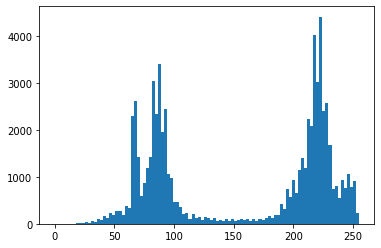

In [33]:
plt.hist(denoised_img_u.flat,bins=100, range=(0,255))

(array([  87.,    0.,   93.,    0.,   91.,    0.,   85.,    0.,   86.,
           0.,  110.,    0.,   79.,    0.,   93.,    0.,   86.,    0.,
         101.,    0.,  145.,    0.,  134.,    0.,  128.,    0.,  207.,
           0.,  299.,    0.,  625.,    0., 1383.,    0., 1542.,    0.,
        1068.,    0.,  591.,    0.,  437.,    0.,  402.,    0.,  292.,
           0.,  300.,    0.,  291.,    0.,  256.,    0.,  330.,    0.,
         301.,    0.,  401.,    0.,  497.,    0.,  614.,    0.,  819.,
           0.,  902.,    0., 1061.,    0., 1091.,    0., 1198.,    0.,
        1146.,    0., 1155.,    0., 1187.,    0., 1072.,    0.,  989.,
           0.,  969.,    0.,  900.,    0.,  808.,    0.,  735.,    0.,
         591.,    0.,  464.,    0.,  389.,    0.,  317.,    0.,  266.,
         234.]),
 array([ 50. ,  50.5,  51. ,  51.5,  52. ,  52.5,  53. ,  53.5,  54. ,
         54.5,  55. ,  55.5,  56. ,  56.5,  57. ,  57.5,  58. ,  58.5,
         59. ,  59.5,  60. ,  60.5,  61. ,  61.5,  62. ,  62

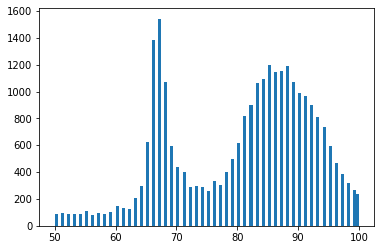

In [34]:
plt.hist(denoised_img_u.flat,bins=100, range=(50,100))#Zooming the image histogram

75 is the place that the seperation happens!! So lets do our first segmentation....

In [37]:
seg1= denoised_img_u<=75 #the first segmentation of the histogram happens at 75
seg2= (denoised_img_u>75) & (denoised_img_u<=150)

(array([  62.,   28.,   33.,   34.,   21.,   28.,   36.,   37.,   42.,
          43.,   26.,   33.,   42.,   23.,   37.,   39.,   36.,   34.,
          29.,   26.,   63.,   36.,   40.,   44.,   39.,   39.,   43.,
          46.,   56.,   68.,   54.,   71.,   53.,   58.,   71.,   87.,
          92.,  106.,  129.,  183.,  318.,  215.,  258.,  260.,  280.,
         299.,  315.,  307.,  318.,  313.,  347.,  336.,  394.,  426.,
         446.,  467.,  500.,  540.,  651.,  644., 1586.,  987., 1108.,
        1247., 1359., 1423., 1468., 1546., 1516., 1525., 1374., 1294.,
        1113.,  966.,  861.,  742.,  654.,  557.,  468.,  416.,  602.,
         267.,  252.,  261.,  279.,  289.,  317.,  334.,  365.,  397.,
         380.,  388.,  298.,  401.,  374.,  345.,  346.,  216.,  111.,
         115.]),
 array([150.  , 151.05, 152.1 , 153.15, 154.2 , 155.25, 156.3 , 157.35,
        158.4 , 159.45, 160.5 , 161.55, 162.6 , 163.65, 164.7 , 165.75,
        166.8 , 167.85, 168.9 , 169.95, 171.  , 172.05, 17

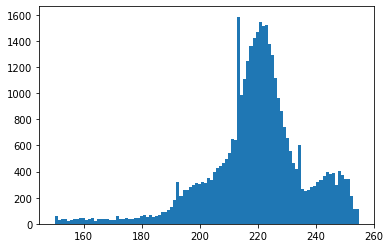

In [36]:
plt.hist(denoised_img_u.flat,bins=100, range=(150,255))#Zooming the image histogram

In [38]:
seg3= (denoised_img_u>150) & (denoised_img_u<=236)
seg4= (denoised_img_u>236) & (denoised_img_u<=255)

Now the image is segmented to for binary values

Now we should combine the different segments!

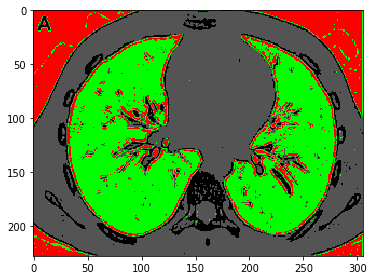

In [42]:
#First we create an array with the same size of the original image
h,w=denoised_img_u.shape
combined_segments=np.zeros((h,w,3))
#Filling different segments with different colors
combined_segments[seg1]=(1,0,0)
combined_segments[seg2]=(0,1,0)
combined_segments[seg3]=(0,0,1)
combined_segments[seg3]=(0.33,0.33,0.33)
io.imshow(combined_segments)

### Cleaning

The segmentation has been done well, but the there are some spots in it. So, we should clean it. We will use binary opening and binary closing mathematical operations to do so.

In [60]:
from scipy import ndimage as nd
kernel_size=np.ones((3,3))
seg1_opened=nd.binary_opening(seg1,kernel_size)
seg1_closed=nd.binary_closing(seg1_opened,kernel_size)

seg2_opened=nd.binary_opening(seg2,kernel_size)
seg2_closed=nd.binary_closing(seg2_opened,kernel_size)

seg3_opened=nd.binary_opening(seg3,kernel_size)
seg3_closed=nd.binary_closing(seg3_opened,kernel_size)

seg4_opened=nd.binary_opening(seg4,kernel_size)
seg4_closed=nd.binary_closing(seg4_opened,kernel_size)

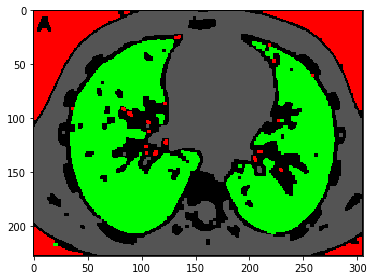

In [61]:
combined_segments_cleaned=np.zeros((h,w,3))
combined_segments_cleaned[seg1_closed]=(1,0,0)
combined_segments_cleaned[seg2_closed]=(0,1,0)
combined_segments_cleaned[seg3_closed]=(0,0,1)
combined_segments_cleaned[seg3_closed]=(0.33,0.33,0.33)
io.imshow(combined_segments_cleaned)